<h1 style="color:rgb(0,120,170)">Assignment 3: Constrained Optimization, SVMs</h1><br>
<h2 style="color:rgb(0,120,170)">Copyrighting and Fare Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you, as a student, to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - your 8-digit student number on ID card (without k)</li>
</ol>

**Example:**<br>
 ✅ Assignment_0_RenéDescartes_12345678<br>
 ✅ Assignment_0_SørenAabyeKierkegaard_12345678<br>
 ❌ Assignment0_Peter_Pan_k12345678

Don't add any cells but use the ones provided by us. You may notice that most cells are tagged such that the unittest routine can recognise them.

We highly recommend you to develop your code within the provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. Don't import any other packages than those listed in the cell with the "imports" tag.

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest they won't be available either.

*Good luck!*

<h3 style="color:rgb(210,90,80)">Calculation 1 (25 points):</h3>

Consider the following primal (constrained convex optimization) problem: 

\begin{align*}
\text{Minimize} \qquad &f(w_1,w_2) = 2\,(w_1^4+w_2^4)
\\
\text{subject to} \qquad &h(w_1,w_2) = 4-w_1+w_2 \le 0 \\
\end{align*}

We try to solve it via two ways. Perform the following tasks:
* Compute the Lagrangian $L(w_1,w_2,\alpha)$.
* Calculate its derivatives with respect to $w_1$ and $w_2$ and calculate the zeros of these derivatives ($w_1^*,w_2^*$).

First way:

* Solve the problem using the KKT conditions.

Second way:
* Write down the dual problem and solve it directly without(!) the help of the KKT-conditions. Hint: You need the derivative of $\mathcal{L} = L(w_1^*,w_2^*,\alpha)$ with respect to $\alpha$.

For your calculation use the given notation.

1) Lagrangian function
$$
L(w_1, w_2, \alpha) = f(w_1, w_2)+\alpha \cdot h(w_1, w_2) = 2(w_1^4+w_2^4)+\alpha(4-w_1+w_2)
$$

2) Derivatives of Lagrangian and zeros of these derivatives ($w_1^*,w_2^*$)
Calculating the derivative w.r.t. $w_1$ and setting to zero
$$
\frac{\partial L }{\partial w_1} = -\alpha + 8w_1^3 = 0
$$

$$
w_1 = \sqrt[3]{\frac{\alpha}{8}}
$$

Calculating the derivative w.r.t. $w_2$ and setting to zero
$$
\frac{\partial L }{\partial w_2} = \alpha + 8w_2^3 = 0
$$

$$
w_2 = \sqrt[3]{\frac{-\alpha}{8}}
$$

Substituting into the Lagrangian: 

$$
L(\alpha) = \frac{1}{8} (2-3\sqrt[3]{-\alpha}-3\sqrt[3]{\alpha})\alpha
$$

and into constraint: 

$$
h(\alpha) = 4-\sqrt[3]{\frac{\alpha}{8}}+\sqrt[3]{\frac{-\alpha}{8}}
$$

3) Solving using first KKT Condition: 

$$
\alpha h(\alpha) = \alpha(4-\sqrt[3]{\frac{\alpha}{8}}+\sqrt[3]{\frac{-\alpha}{8}}) = 0
$$

which leads to $\alpha=0$ (that bring to $w_1=0$, $w_2=0$ and $f(w_1, w_2) = 0$) and to $\alpha=64$ (which goes to $w_1=2$, $w_2=-2$ and $f(w_1, w_2) = 64$). The second solution is the one valid since the first would contraddict the inequality $h$

4) Solving without KKT conditions

For the dual problem, the derivative of $L$ w.r.t. \alpha have to be calculated and set to zero. The $L$ is: 

$$
L(\alpha)= 2\left( \left( \frac{\alpha}{8}\right)^{\frac{4}{3}}+\left( -\frac{\alpha}{8}\right)^{\frac{4}{3}}\right)+\alpha\left( 4-2\left( \frac{\alpha}{8}\right)^{\frac{1}{3}}\right)
$$

Imposing $\frac{\partial L }{\partial \alpha} = 0$ leads again to $a=64$


<h3 style="color:rgb(210,90,80)">Calculation 2 (25 points):</h3>

Suppose we replace in the primal optimization problem of C-SVMs the penalty
term $\|\xi\|_1=\sum_{i=1}^l \xi_i$ with $\|\xi\|_2^2=\sum_{i=1}^l \xi_i^2$ (that is we use the quadratic hinge loss instead). Thus, the primal problem we are considering is given as follows (with $C>0$):

\begin{align*}
\text{Minimize} \qquad &\frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^l \xi_i^2 \\
\text { subject to } \qquad  &-[y_i\left(\mathbf{w} \cdot \mathbf{x}_i-b\right) -1+\xi_i] \leq 0 \\
\text{and} \qquad &-\xi_i \leq 0 \ \ \textrm{for} \ \ i=1,...,l
\end{align*}

for all $i=1,...,l$. Give the associated dual optimization problem by making use of the KKT-Theorem and perform the following tasks:

* Why can the KKT-Theorem be applied?
* Calculate the Lagrange function $L$.
* Calculate its derivatives (with respect to $w_i$, $b$ and $\xi_i$) and compute their zeros. 
* Write down the dual function (named $\cal L$ in the slides) and the corresponding dual problem, depending on $2l$ Lagrange multipliers. (You don't need to solve the dual problem.)
* Simplify the dual problem so that it only depends on $l$ Lagrange variables. Hint: The maximization with respect to $\lambda_i$ can be done quite easily. (Again: You don't need to solve the dual problem. Just find the simplified form.)

**Please provide reasoning and explanations in full sentences.**

1) Why can the KKT-Theorem be applied?

The condition for the KKT-Theorem are:
- Convexity: The objective function and the inequality constraints should be convex. In this case, the objective function $\frac{1}{2}\|\mathbf{w}\|^2 + C \sum_{i=1}^l \xi_i^2$ is convex because the square of a norm and the sum of squared terms are both convex functions. The constraints are linear (hence convex).
- Twice continuously differentiable: the function must be twice differentiable which is true in this case
- Slater's condition: For convex problems, Slater's condition requires the existence of a feasible point where all inequality constraints are strictly satisfied. Given the nature of the constraints in this problem, it's possible to find such points.

Since these conditions are met, the KKT theorem can be applied to the given optimization problem.

2) Lagrangian function

Let $\alpha_i$ and $\mu_i$ be the Lagrange multipliers for the given constraints. The Lagrangian is given by:

$$
L(\mathbf{w}, b, \boldsymbol{\xi}, \boldsymbol{\alpha}, \boldsymbol{\mu}) = \frac{1}{2}\|\mathbf{w}\|^2 + C \sum_{i=1}^l \xi_i^2 - \sum_{i=1}^l \alpha_i [y_i(\mathbf{w} \cdot \mathbf{x}_i - b) - 1 + \xi_i] - \sum_{i=1}^l \mu_i \xi_i
$$

3) Derivative of Lagrangian

Next, I calculate the partial derivatives of the Lagrangian with respect to $\mathbf{w}$, $b$, and $\xi_i$, and set them to zero to find the stationary points:

- Derivative w.r.t. $\mathbf{w}$:
  $$
  \frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^l \alpha_i y_i \mathbf{x}_i = 0
  $$
  Leading to:
  $$
  \mathbf{w} = \sum_{i=1}^l \alpha_i y_i \mathbf{x}_i
  $$

- Derivative w.r.t. $b$:
  $$
  \frac{\partial L}{\partial b} = \sum_{i=1}^l \alpha_i y_i = 0
  $$

- Derivative w.r.t. $\xi_i$:
  $$
  \frac{\partial L}{\partial \xi_i} = 2C\xi_i - \alpha_i - \mu_i = 0
  $$
  Leading to:
  $$
  \xi_i = \frac{\alpha_i + \mu_i}{2C}
  $$


4) The dual function and the dual problem

The dual function is obtained by substituting the above expressions back into the Lagrangian. The dual problem is then to maximize this dual function with respect to the Lagrange multipliers $\alpha_i$ and $\mu_i$, subject to the constraints that these multipliers are non-negative. The dual function is:

$$
L(\boldsymbol{\alpha}, \boldsymbol{\mu}) = \frac{1}{2}\|\sum_{i=1}^l \alpha_i y_i \mathbf{x}_i\|^2 + C \sum_{i=1}^l (\frac{\alpha_i + \mu_i}{2C})^2 - \sum_{i=1}^l \alpha_i [y_i(\sum_{i=1}^l \alpha_i y_i \mathbf{x}_i \cdot \mathbf{x}_i - b) - 1 + \frac{\alpha_i + \mu_i}{2C}] - \sum_{i=1}^l \mu_i \frac{\alpha_i + \mu_i}{2C}
$$

The dual problem is:

$$
\text{Maximize } L(\boldsymbol{\alpha}, \boldsymbol{\mu}) \quad \text{subject to } \alpha_i \geq 0, \mu_i \geq 0
$$


5) Simplify

To simplify the dual problem, using the formula:



<h3 style="color:rgb(210,90,80)">Code 1 (10 points):</h3>

The aim of the following task is to equip you with some intuition concerning the application of different SVMs to an easy data set. <br>
You should also observe how different versions of the SVMs with different hyperparameters react to additional noise. To this end we provided you with a function `plot_data` which is intended to create proper visualizations of important characteristics of linear and nonlinear SVMs, like the decision border and support vectors. <br>
The usual routine for applying SVMs in Python, which is also used here, is given by the following sklearn-package: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. 

Your first task is to get familiar with the `plot_data` function by applying it to the easy data set `radial_data.csv`. Iterate over different kernels and hyperparameters (consider the documentation for details), i.e. perform the following tasks:
* Plot the dataset using the provided functions. (Just execute the existing code.)
* Using the sklearn-package mentioned above, write a function `iter_Degree` that applies an SVM with a polynomial kernel and $C=10$ to the data and iterates over the degrees (i.e. hyperparameter) from 1 to 5. Function `iter_Degree` must return a list of model parameters for each model you initiated and fitted on our data. The output of `get_params()` is a dictionary; see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC.get_params">sklearn docs</a>. Apply `plot_data` to each hyperparameter setting. Then return.



In [33]:
#Nothing to do here
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from typing import Sequence, List, Tuple

np.random.seed(1234)  

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn import svm

In [34]:
#Nothing to do here
def load_data(id_data: int=1):
    """Function allows to load data from csv
    @returns: tuple (X,y)"""
    if id_data ==1:
        Z = np.genfromtxt('radial_data.csv', delimiter=',')
        return Z[:,:-1], Z[:,-1]

def get_meshgrid(X,resolution):
    """Function creates space/grid. Mostly used for plotting"""
    s = np.max(np.abs(X))*1.05
    ls = np.linspace(-s, s, resolution)
    X1,X2 = np.meshgrid(ls, ls, sparse=False)
    return np.c_[X1.ravel(), X2.ravel()]

def plot_data(X, y, 
              model=None,
              plot_boarders=True, 
              plot_classification=True,  
              plot_support_vectors = True,
              plot_size=7, 
              resolution=500, 
              title='data visualization', 
              color = ['blue','orange']):
    """Plotting your data
    @param model already trained SVM model, is None if you want to plot data only
    all other parameters must be intuitively clear for you"""
    
    if model is not None:#if you want to plot model
        if plot_classification and plot_boarders:
            col=2  #if you want to plot model and boarders
        else :
            col=1  #if you want to plot model only
        
        fig,axs = plt.subplots(1,col,figsize=(plot_size*col,plot_size))
        
        grid = get_meshgrid(X,resolution)        
        V = model.support_vectors_
        mask_sv = model.support_ #np.where(np.isin(X[:,0],V[:,0]))[0] 
        
        kernel = model.kernel
        if kernel == 'poly':
            title = f"kernel: {kernel} - degree: {model.degree} - cost:{model.C}"
        elif kernel == 'rbf':
            title = f"kernel: {kernel}"
            if model.gamma != "auto_deprecated" :
                title+= f" - gamma: {model.gamma}" 
            title += f" - cost: {model.C}"
                
        for i in range(col): 
            if col>1:
                ax = axs[i]
            else:
                ax = axs
            ax.set_aspect('equal')
            if i==0 and plot_boarders:
                ax.set_title('Margins - ' + title,fontsize=plot_size*2)
                boarders = model.decision_function(grid)
                mask_pos = boarders >= 1
                mask_neg = boarders <= -1
                ax.scatter(grid[mask_pos,0], grid[mask_pos,1], c=color[0], alpha=0.01, s=10)
                ax.scatter(grid[mask_neg,0], grid[mask_neg,1], c=color[1], alpha=0.01, s=10)
                ax.scatter(X[mask_sv,0], X[mask_sv,1], c='g',label= str(np.sum(model.n_support_)) +' SV',s=40,marker='o')
            if plot_classification and (i==1 or not plot_boarders):
                ax.set_title('Classification - ' + title,fontsize=plot_size*2)
                classification = model.predict(grid)
                mask_pos = classification > 0
                mask_neg = classification < 0
                ax.scatter(grid[mask_pos,0], grid[mask_pos,1], c=color[0], alpha=0.01, s=10)
                ax.scatter(grid[mask_neg,0], grid[mask_neg,1], c=color[1], alpha=0.01, s=10)
                classification = model.predict(X)
                mask_wrong = classification != y 
                ax.scatter(X[mask_wrong,0], X[mask_wrong,1], c='magenta',label=str(np.sum(mask_wrong)) + ' faults',s=40,marker='o')
            m = y > 0
            ax.scatter(X[m,0], X[m,1], c=color[0],label='class +1',s=10)
            m = np.logical_not(m)
            ax.scatter(X[m,0], X[m,1], c=color[1],label='class -1',s=10)
            ax.legend(loc='lower left', fontsize=plot_size*1.5)   
    
    else:
        fig,axs = plt.subplots(1,1,figsize=(plot_size,plot_size))
        axs.set_aspect('equal')
        m = y > 0
        axs.scatter(X[m,0], X[m,1], c=color[0],label='class +1',s=10)
        m = np.logical_not(m)
        axs.scatter(X[m,0], X[m,1], c=color[1],label='class -1',s=10)
        axs.legend(loc='lower left', fontsize=plot_size*1.5)
        plt.title(title, fontsize=plot_size*2)
    plt.show()

In [35]:
#load data
#leave as it is
X,y = load_data(1)

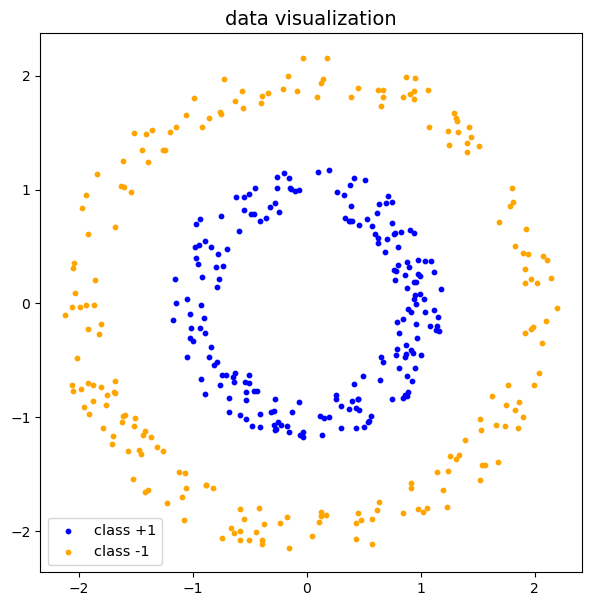

In [36]:
#plot your data ↓↓↓
plot_data(X, y)

In [37]:
def iter_Degree(degree_range: Sequence[int], X: np.ndarray, y:np.ndarray) -> List[dict]:
    """
    Function iter_Degree fits SVM using defined range of degrees and plots every variation.
    @ degree_range: range of integer degrees
    @ returns list of dictionaries, length of list = length of degree_range
    """
    list_of_model_params = []
    #your code ↓↓↓
    # hint: for plotting use a already defined function

    list_of_model_params = []
    for degree in degree_range:
        # Create an SVM with a polynomial kernel and cost C=10
        model = svm.SVC(kernel="poly", degree=degree, C=10)
        # Fit the model to the data
        model.fit(X, y)
        # Plot the data and model
        plot_data(X, y, model)
        # Store the model parameters
        list_of_model_params.append(model.get_params())
    
    # return list
    return list_of_model_params

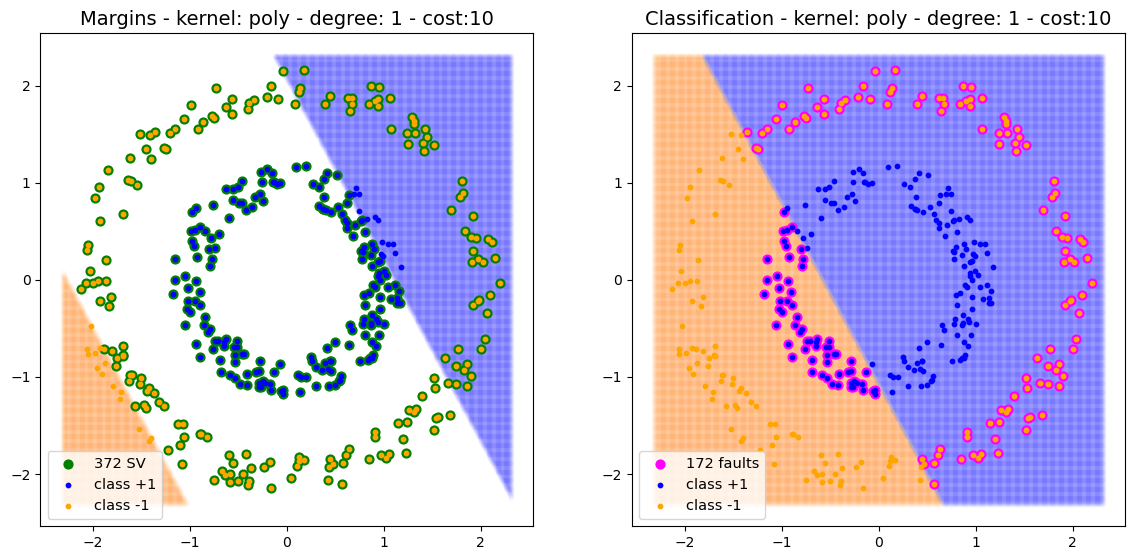

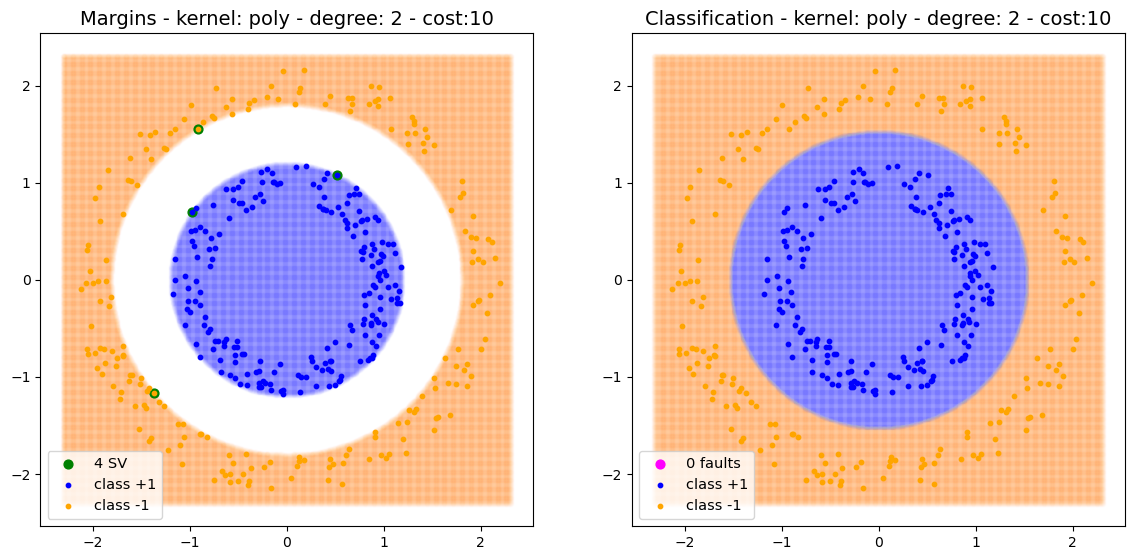

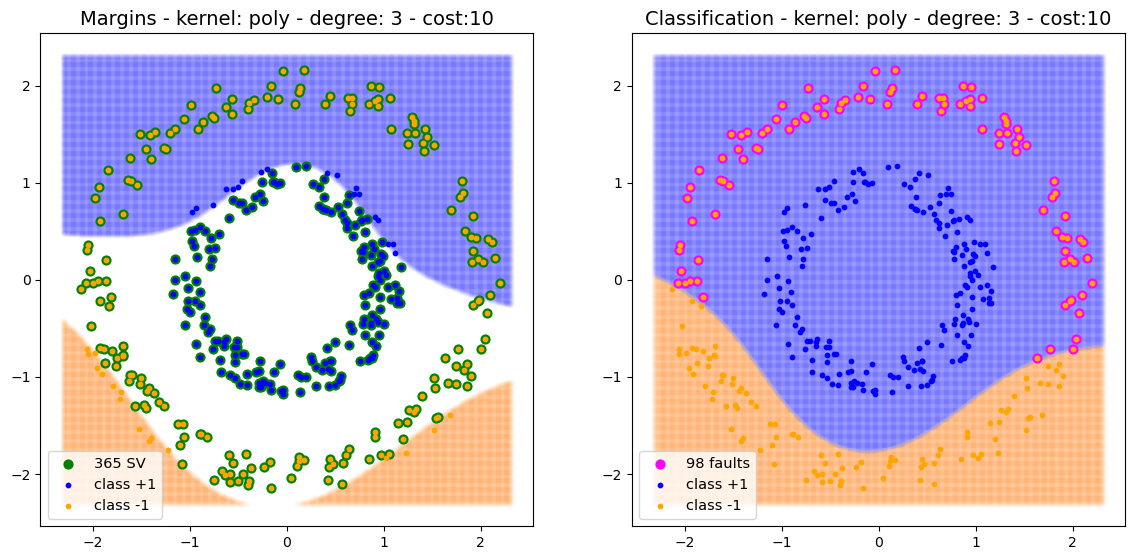

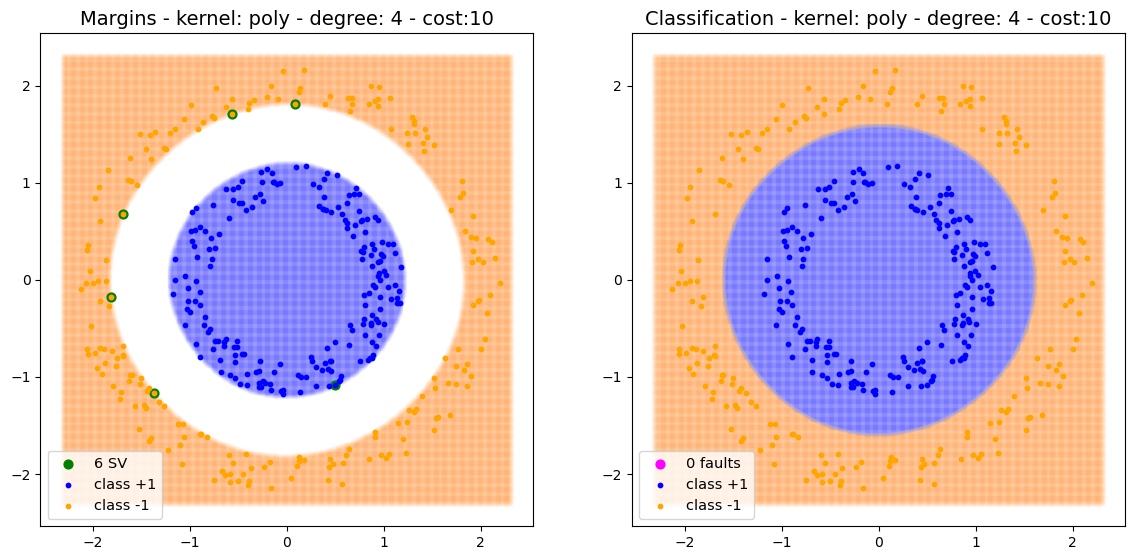

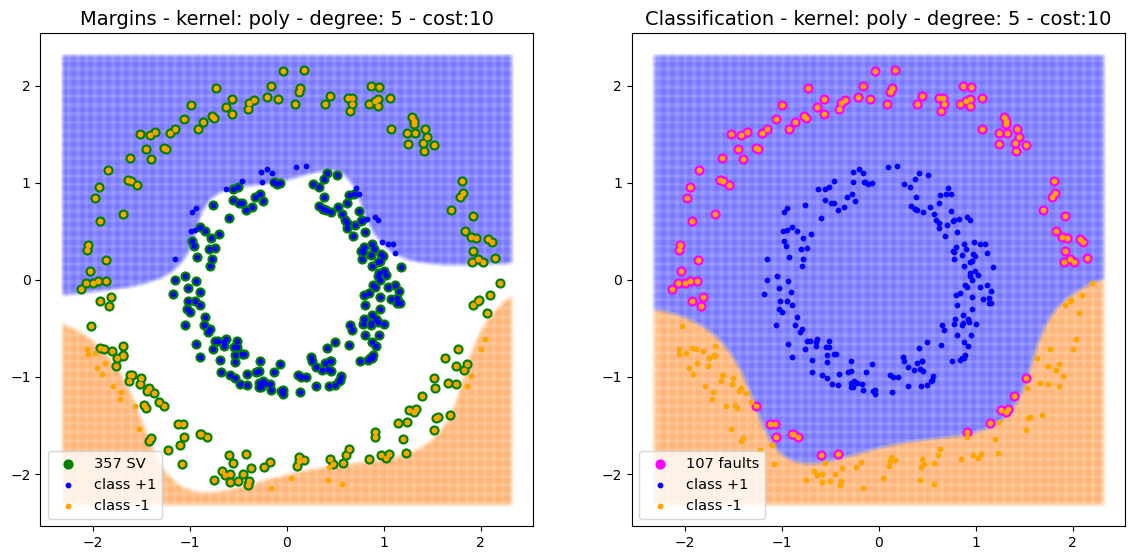

In [38]:
plots_list_2 = []
for degree in range(1,6):
    
    model = svm.SVC(kernel="poly",degree=degree,C=10)
    model.fit(X,y)

    axs = plot_data(X,y,model)
    plots_list_2.append(axs)

<h3 style="color:rgb(210,90,80)">Question 1 (5 points):</h3>

What observations can you make from your plots? (several answers may be correct)


a1_) The SVM with polynomial degree 2 already seems to do quite well on the data set.<br>
b1_) The higher the polynomial degree, the better the classifier.<br>
c1_) A very high number of support vectors seems to be an indicator of a good choice of the kernel.<br>

d1_) There is only small difference between the pictures that were produced by polynomial kernels of even degree.<br>
e1_) For kernels with an odd degree, the number of misclassified samples decreases with an increasing degree.<br>
f1_) For odd degrees, one can see that the model complexity increases with increasing degree.

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question.
<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [39]:
example_true = True
example_False = False

a1_ = True #Check again
b1_ = False
c1_ = False

d1_ = True #Check again
e1_ = False #check again
f1_ = True

Now apply an rbf-kernel (with default gamma="scale") and vary the $C$-parameter from close 0 to very large values. After playing around a little bit, try to report on your observations in the subsequent question.

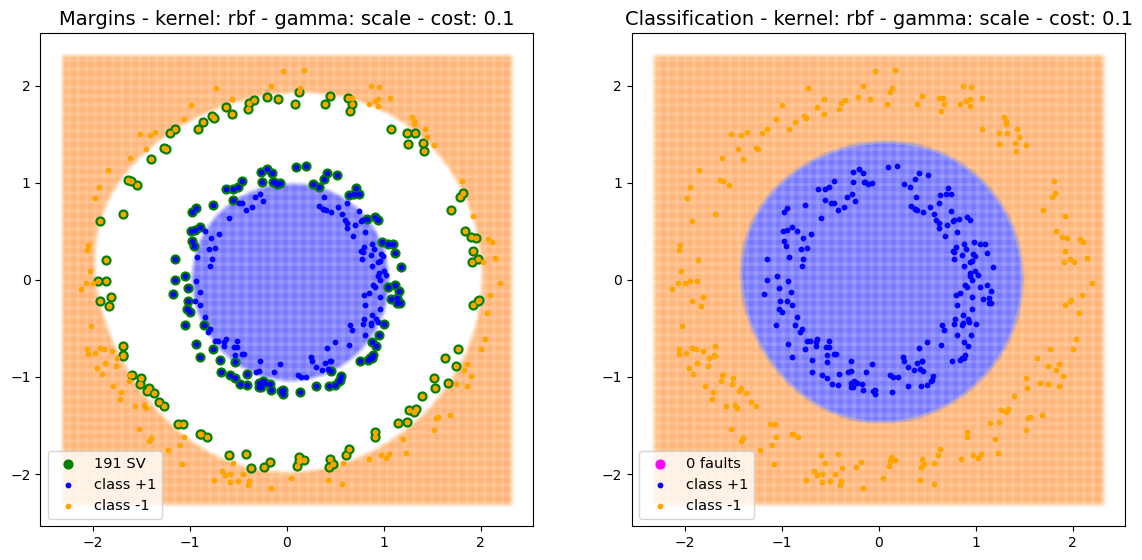

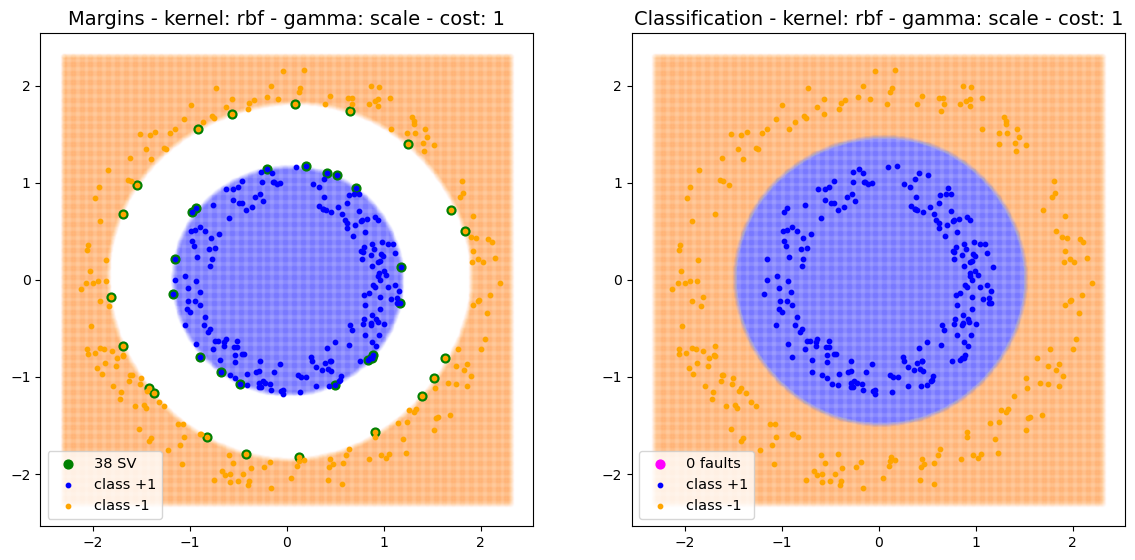

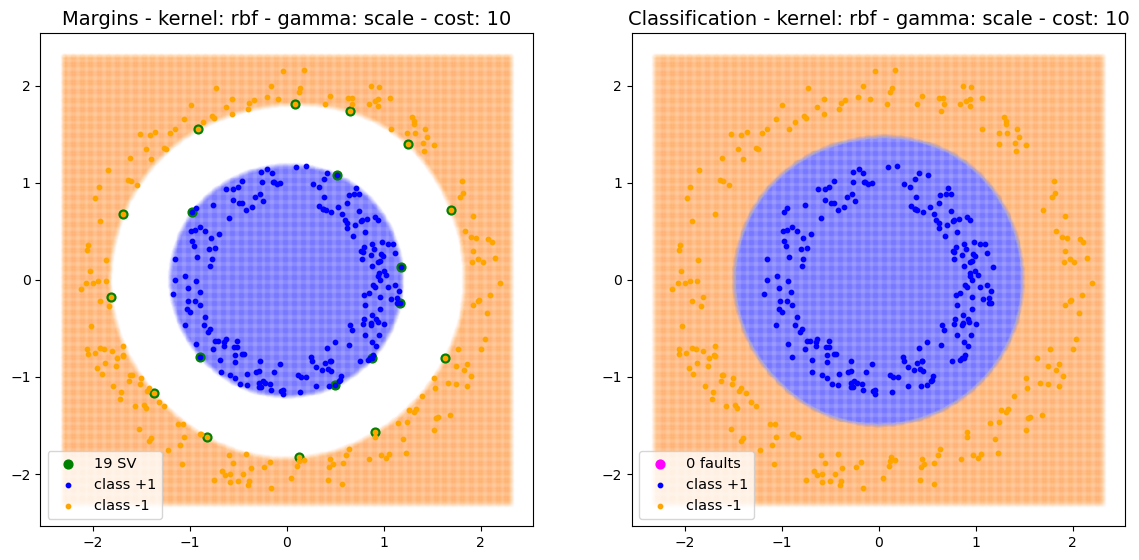

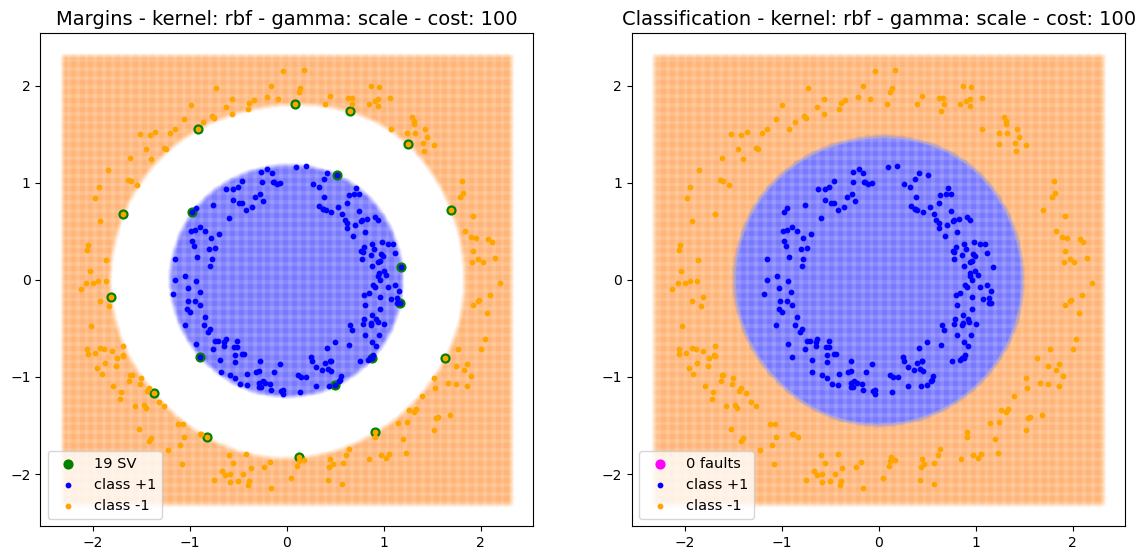

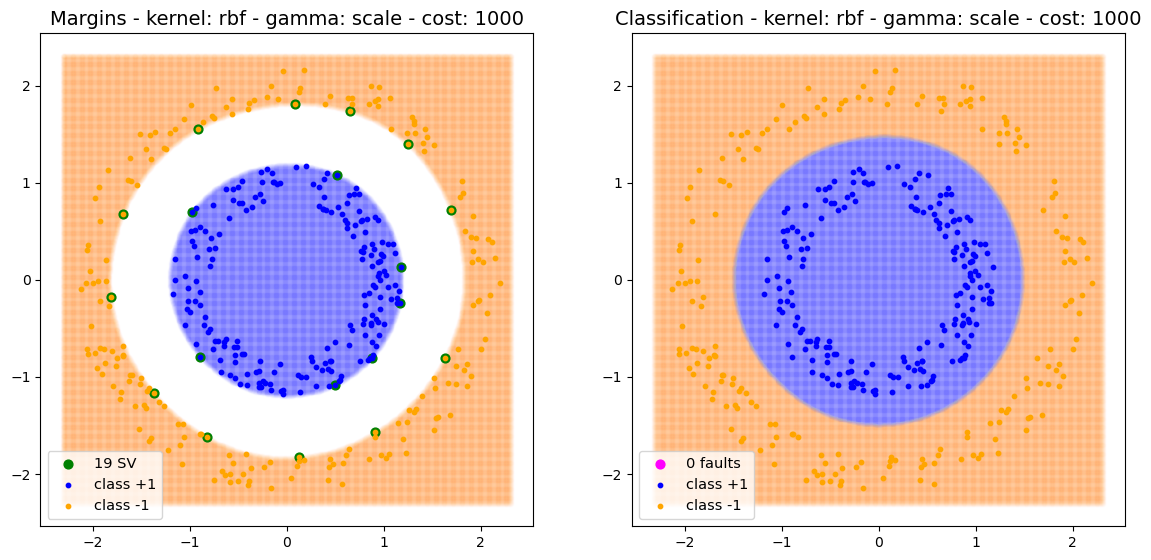

In [40]:
# Here you can play around with the code a little bit. Cell will not be used for grading.

for C in (0.1,1,10,100,1000):
    model = svm.SVC(kernel="rbf",C=C)
    model.fit(X,y)
    plot_data(X,y,model)

<h3 style="color:rgb(210,90,80)">Question 2 (5 points):</h3>

What observations can you make from your plots? (several options may be correct):
  
a2_)  The higher the cost, the more support vectors we have. <br>
b2_)  The decision boarders don't change drastically with increasing $C$, only the number of support vectors does.<br>
c2_)  The lower the cost, the larger the margin.<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [41]:
example_true = True
example_False = False

a2_ = False
b2_ = False
c2_ = True

<h3 style="color:rgb(210,90,80)">Code 2 (10 points):</h3>

* Now use function (polar-to-cartesian) `pol2cart()` which returns **100 two-dimensional** points which are **uniformly** distributed within the circle of radius $r=0.25$ to generate new data points. Label these points with $-1$ and add them to the main (imported) `X` feature matrix and `y` label vector. Your new variables will be `X_new` and `y_new`. Note: In polar coordinates, you may sample the angle uniformly, but be careful with the radius. If you sample the radius uniformly, you will not end up with uniformly sampled points within the circle.
* Now use an **rbf kernel** (which is the default option for `sklearn.svm.SVC`) and again play around with the parameters to explore the effects on the classification performance by appropriately using the `plot_data` function. Write a function `iter_Gamma`, analogous to `iter_Degree`. Try out small costs $C \sim 0.1$ and large costs $ C\sim 1000$ and iterate over different values of $\gamma := 1/(2\sigma^2)$ (compare with the RBF definition in the lecture slides), ranging from $0.1$ to $1$. Again report your observations in the subsequent question.

In [42]:
#code that should help you
#leave as it is
X,y=load_data(1)
def pol2cart(r, phi):
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return(x, y)

In [43]:
#define new data ↓↓↓
def create_new_data() -> Tuple[np.ndarray, np.ndarray]:
    """Function that creates the new data

    For random numbers use np.random module, not np.random.default_rng

    Hint
    ----
    use pol2cart

    Returns
    -------
    tuple
        tuple of 100 2d datapoints and labels (X_new, y_new)
    """
    # Your solution here:

    # num of points
    num_points = 100
    # sqrt for uniform distribution in the circle
    r = np.sqrt(np.random.rand(num_points)) * 0.25  
    # angle uniformly distributed between 0 and 2pi
    phi = np.random.rand(num_points) * 2 * np.pi 
    # Convert polar coordinates to Cartesian coordinates
    X_new = np.array([pol2cart(r[i], phi[i]) for i in range(num_points)])
    # Label points with -1
    y_new = -np.ones(num_points)  

    return X_new, y_new
    

In [44]:
X_new, y_new = create_new_data()

In [45]:
# plot new data ↓↓↓
# Hint: use already defined functions


In [46]:
def iter_Gamma(gamma_range: Sequence[float], C: float, X_new: np.ndarray, y_new: np.ndarray) -> List[dict]:
    """
    Function iter_Gamma fits SVM using defined gamma range and plots every variation.
    @ gamma_range: list of gammas
    @ returns: list of dictionaries, length of list = length of gamma_range
    """
    list_of_model_parameters = []
    # your code ↓↓↓
    # code ends here

    # Combine the new and original data within the function
    X,y = load_data(1) # Line added to avoid to call variables defined outside the function and avoiding to lose points
    X_combined_internal = np.vstack((X, X_new))
    y_combined_internal = np.hstack((y, y_new))

    for gamma in gamma_range:
        model = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_combined_internal, y_combined_internal)
        plot_data(X_combined_internal, y_combined_internal, model)
        list_of_model_parameters.append(model.get_params())

    return list_of_model_parameters


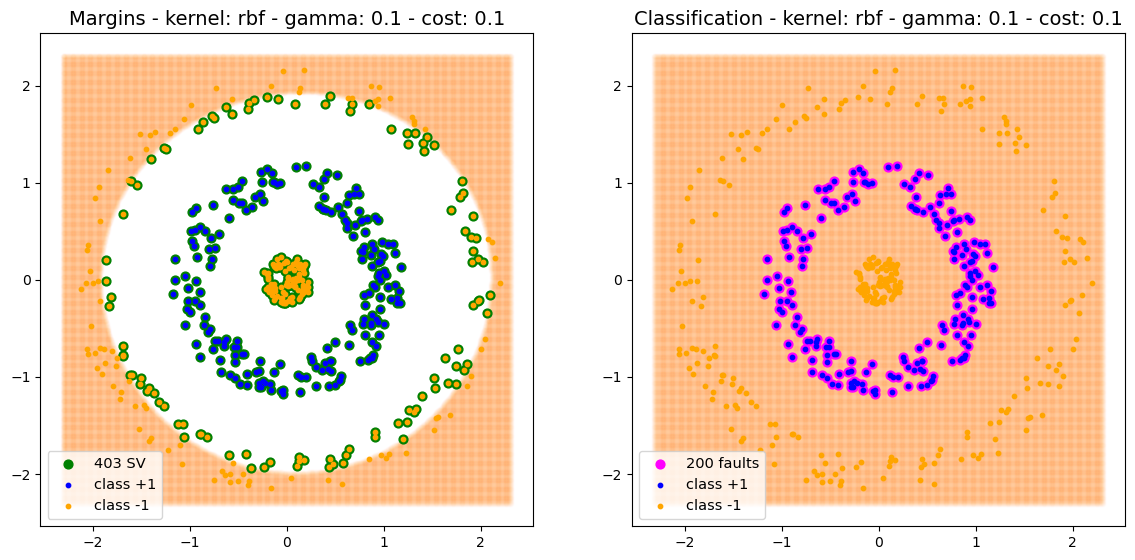

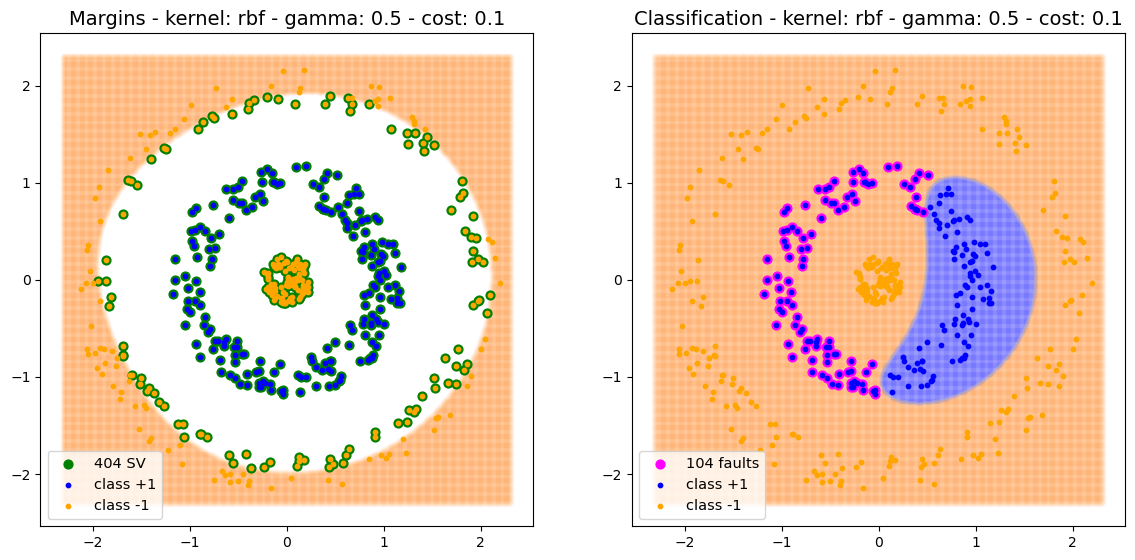

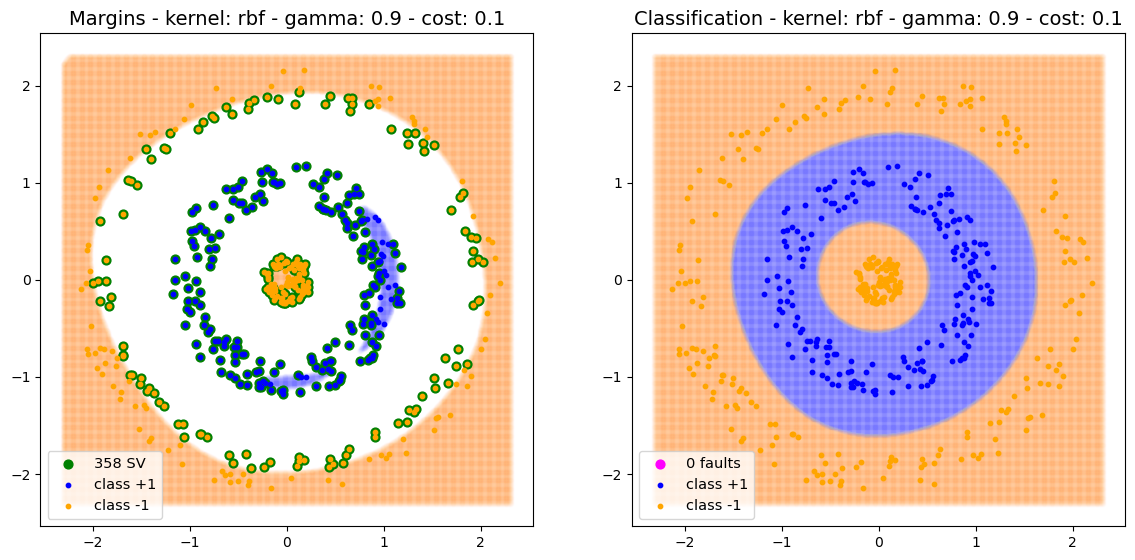

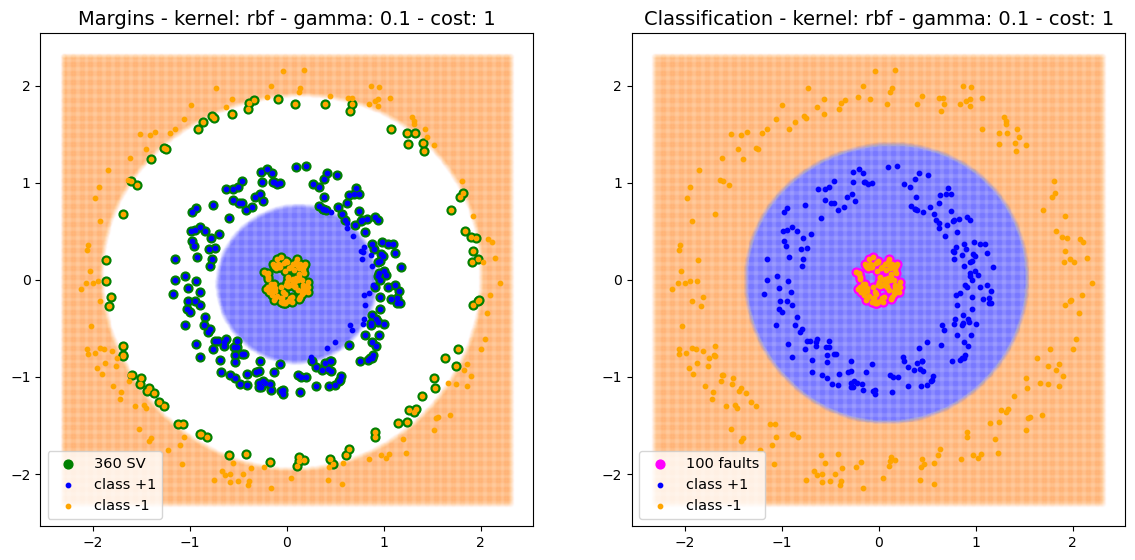

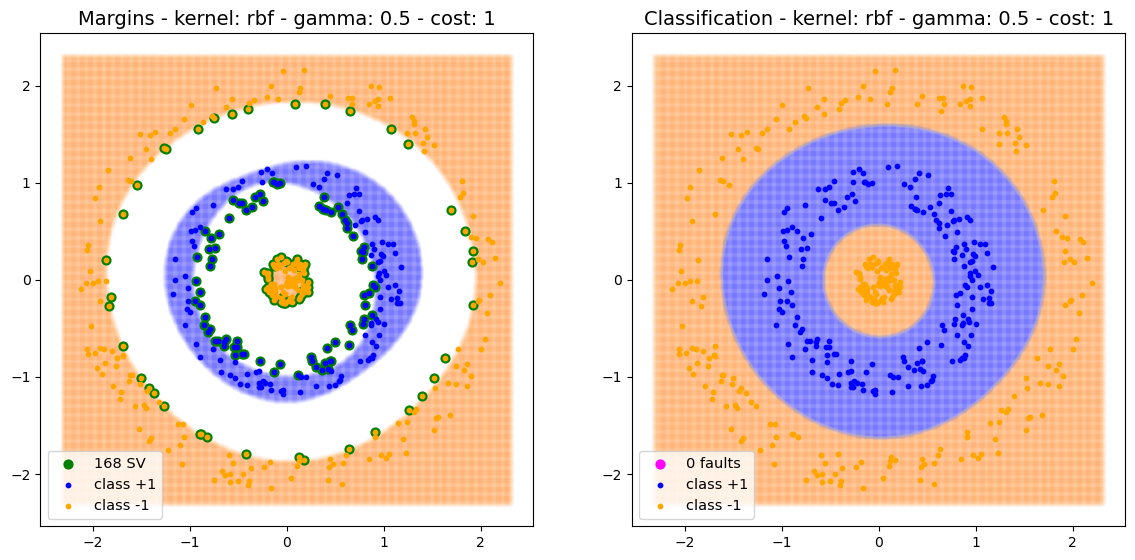

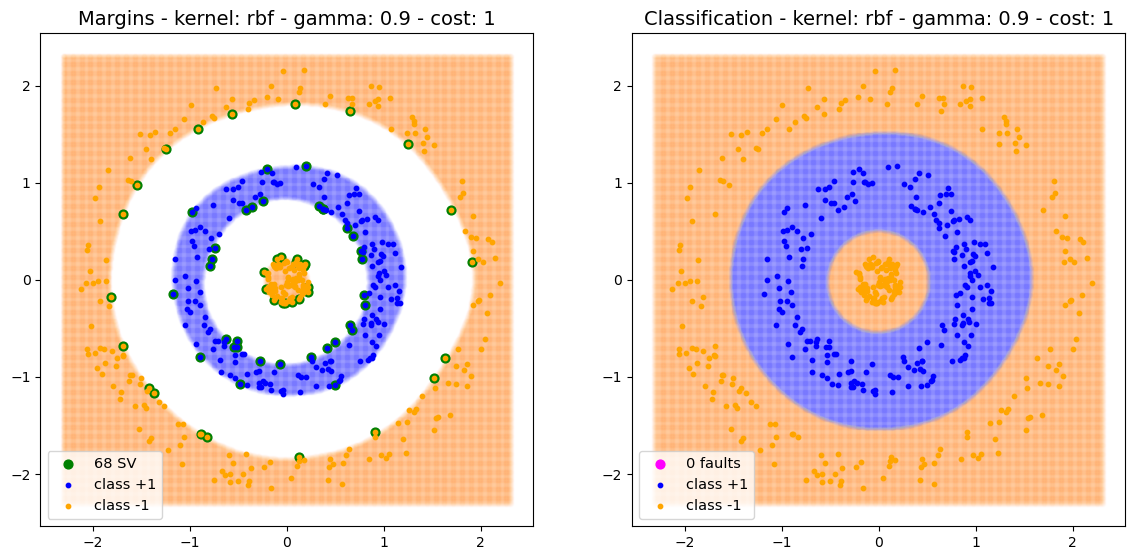

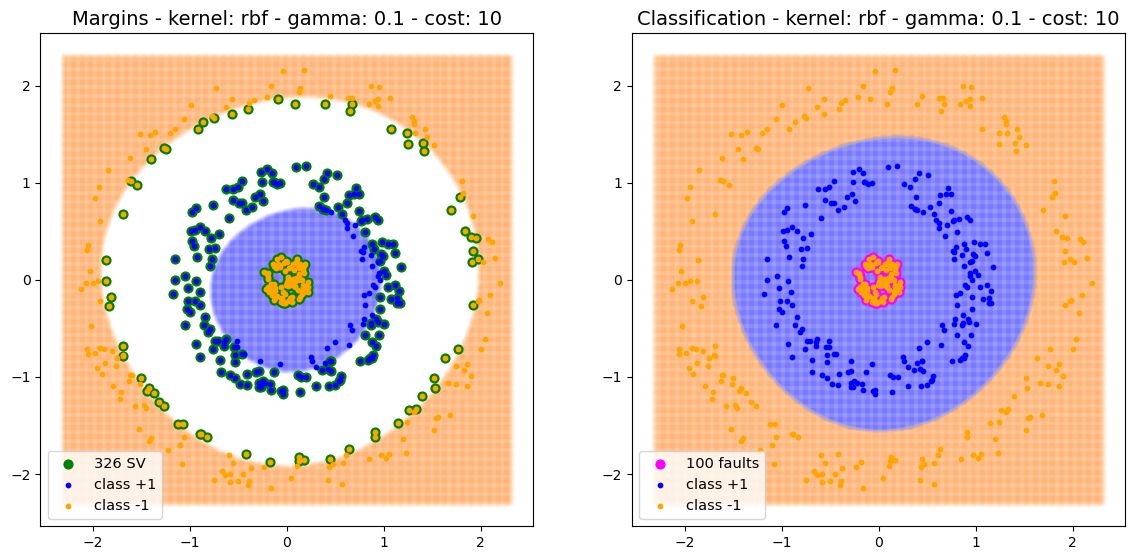

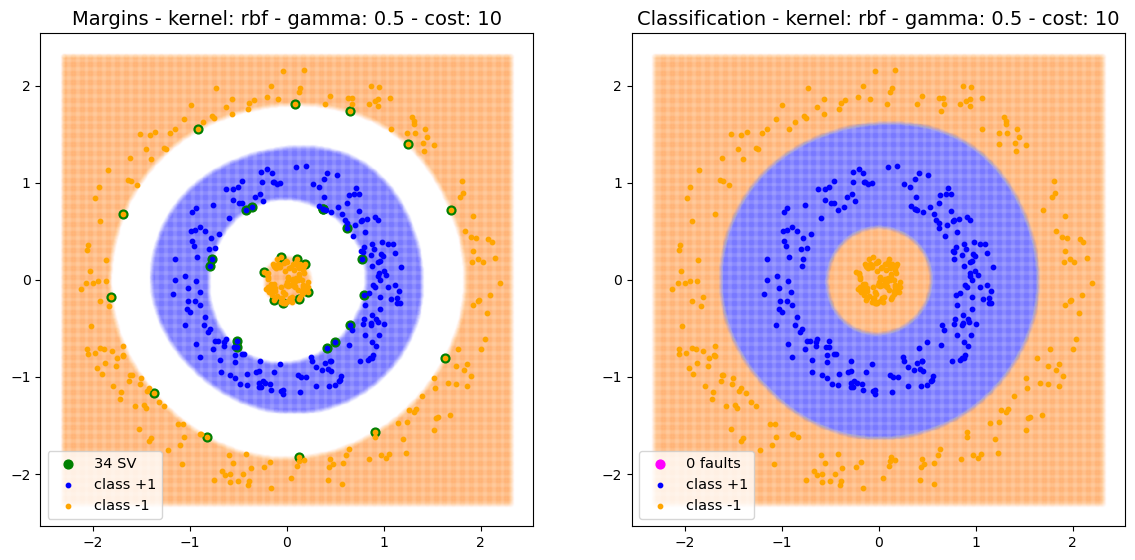

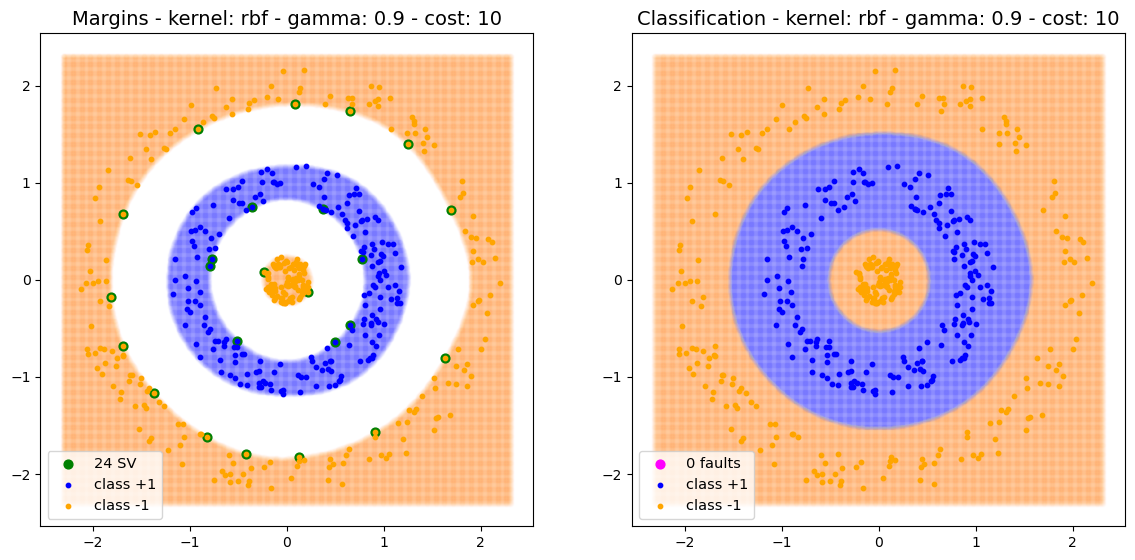

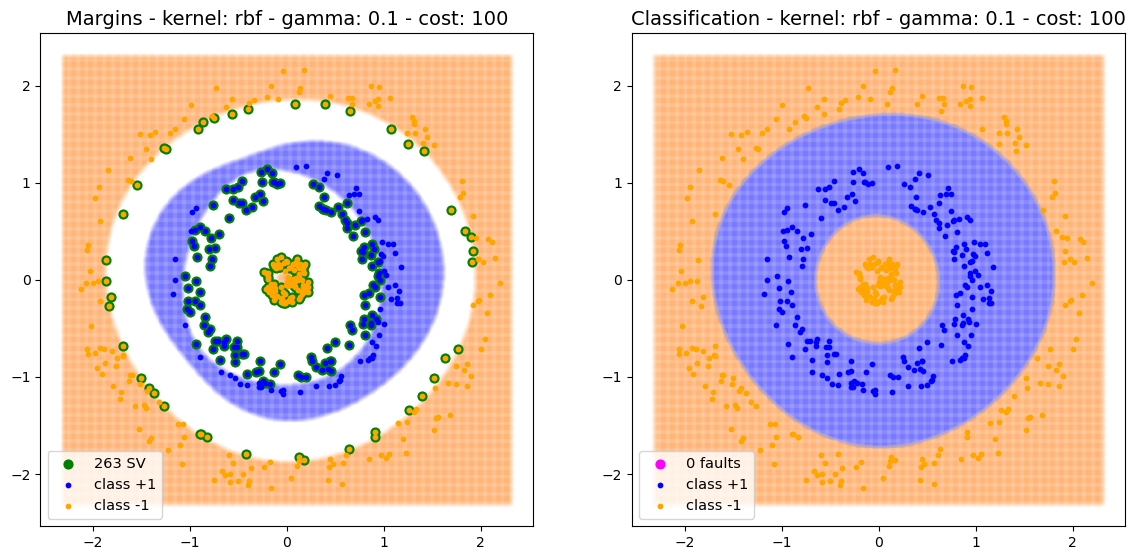

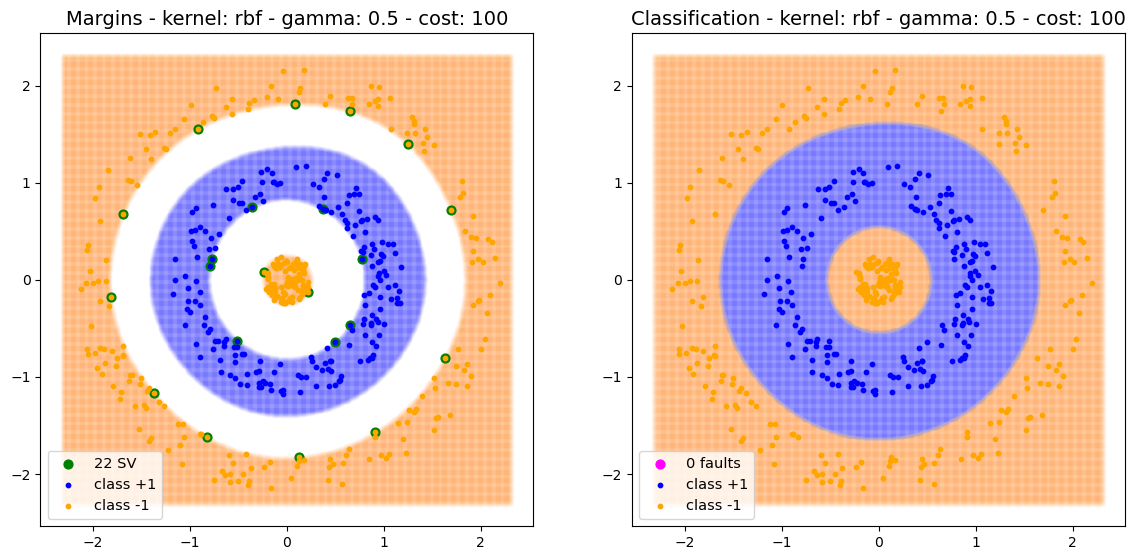

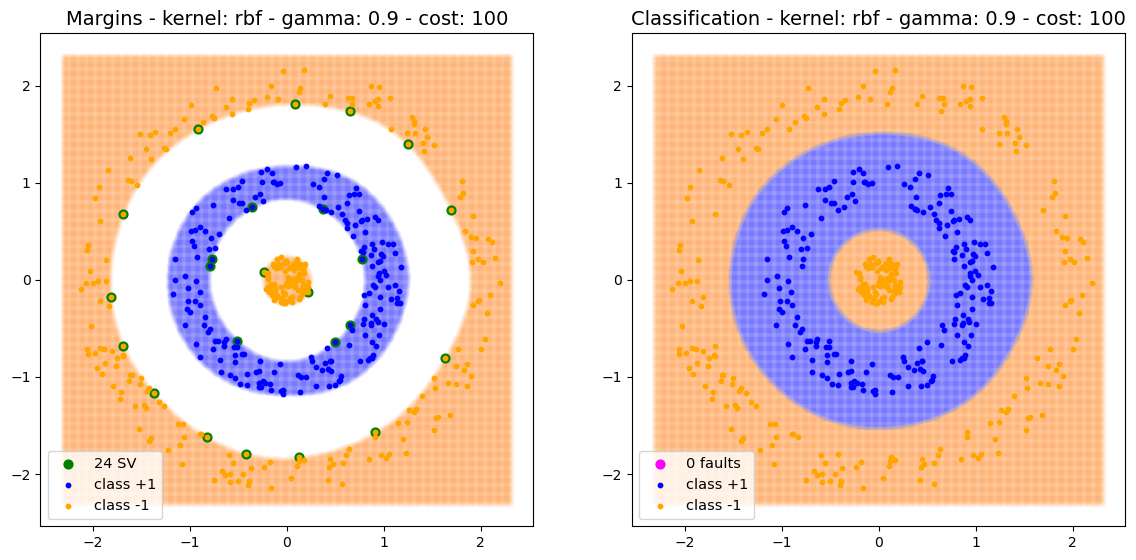

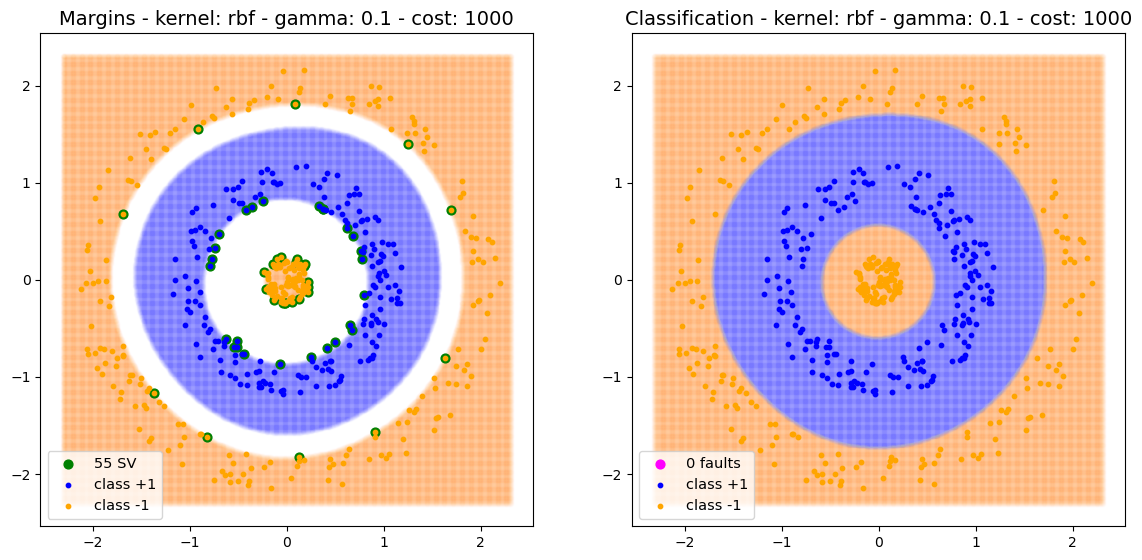

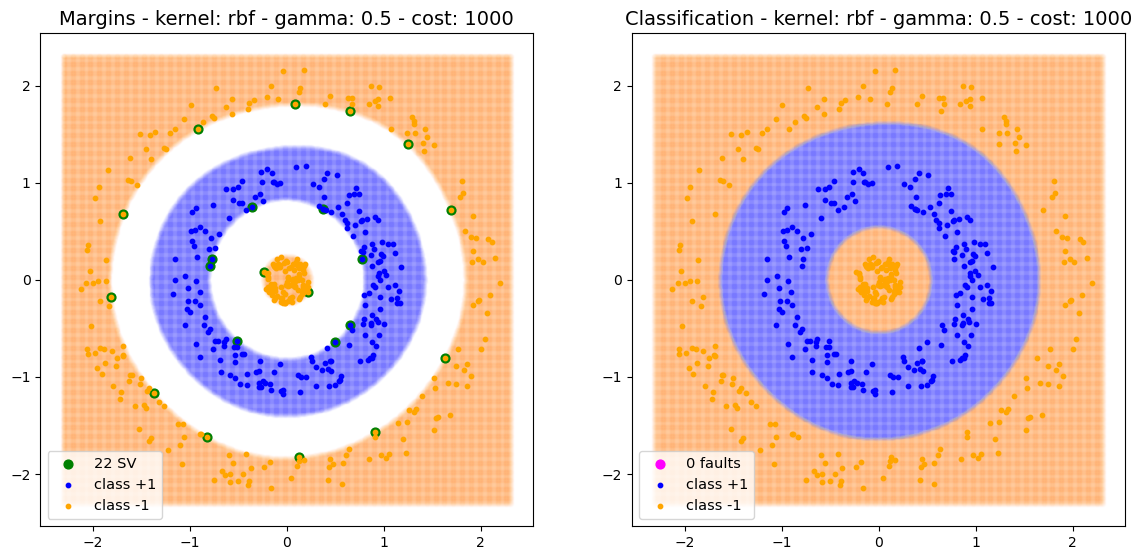

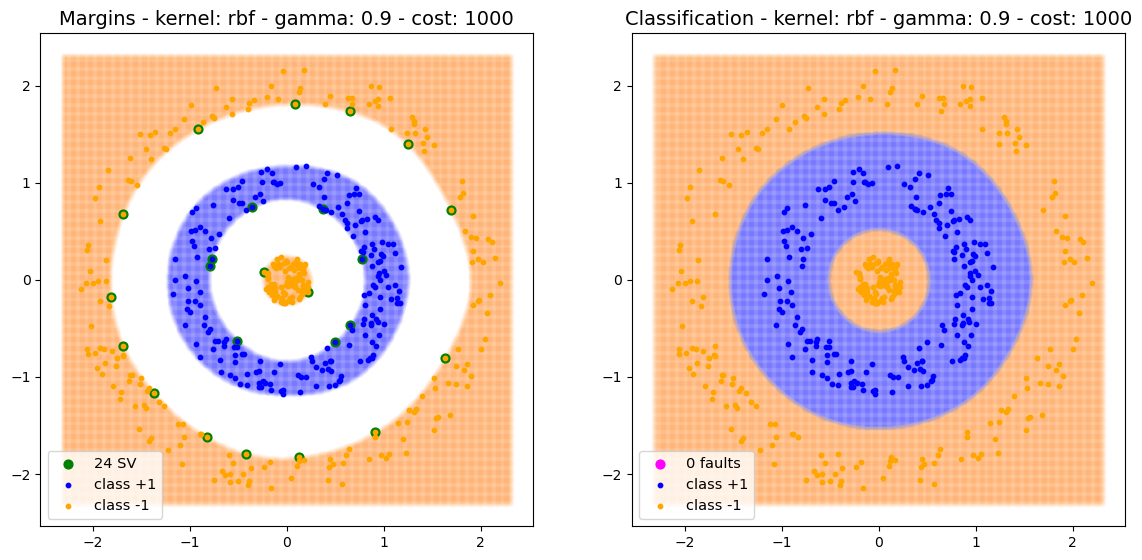

In [47]:
cost_values = range(-1,4)
gamma_values = [0.1,0.5,0.9]

for cost in cost_values:
    iter_Gamma(gamma_values,10**cost,X_new,y_new)

<h3 style="color:rgb(210,90,80)">Question 3 (5 points):</h3>

What observations can you make from your plots? Tick the correct boxes:

a3_) For a fixed $\gamma$, the larger the cost $C$, the higher the number of support vectors.<br>
b3_) For relatively large $C$ and relatively large $\gamma$ (say $C \geq 100$ and $\gamma > 0.5$), enlarging $\gamma$ further doens't improve your performance significantly. </u><br>
c3_) For fixed $C$, increasing $\gamma$ (i.e. decreasing the width of the Gaussian) typically increases the model complexity of the SVM. <br>
d3_) The higher the cost, the smaller the margin.<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [48]:
example_true = True
example_False = False

a3_ = False
b3_ = True
c3_ = True
d3_ = True

<h3 style="color:rgb(210,90,80)">Code 3 (10 points):</h3>

* Finally, we want to investigate, how the rbf kernel classifier reacts to outliers. To this end add a single (outlier) point $(1.8,1.3)$ to your new data set `X_new`,`y_new` (i.e. the data with the additional disk with $-1$ labels) and label this point with $y=+1$. Plot the data set.
* Use an rbf kernel and play around with the parameter to explore the effects on the classification performance by again appropriately using the `plot_data` function. Try out small costs $C \sim 0.1$ and large costs $ C\sim 1000$ and also iterate over different values of $\gamma$, ranging from $0.1$ to $1$. (Reuse iterative functions defined above). Report your observations in the subsequent question. 

In [49]:
# update X_new and y_new by adding point as described in the task↓↓↓
def add_points(X_new: np.ndarray, y_new: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # your code here

    # The outlier point as a 2D numpy array
    outlier_point = np.array([[1.8, 1.3]])  
    # Label for the outlier point
    outlier_label = np.array([1])  

    X_new_ = np.vstack((X_new, outlier_point))
    y_new_ = np.hstack((y_new, outlier_label))
    
    return X_new_, y_new_

In [50]:
# nothing to do, just run the cell
X_new_plus1, y_new_plus1 = add_points(X_new, y_new)

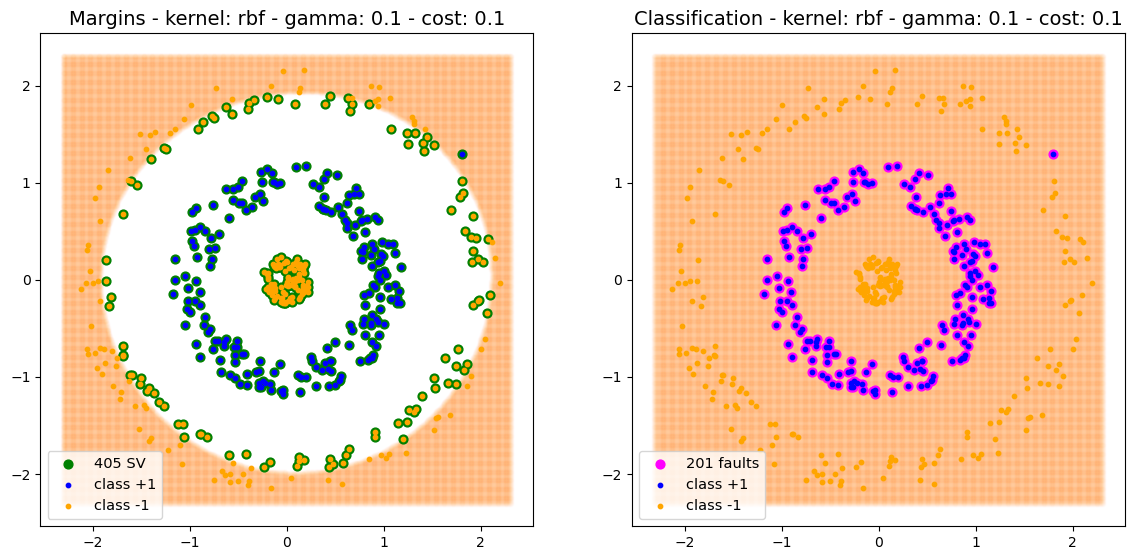

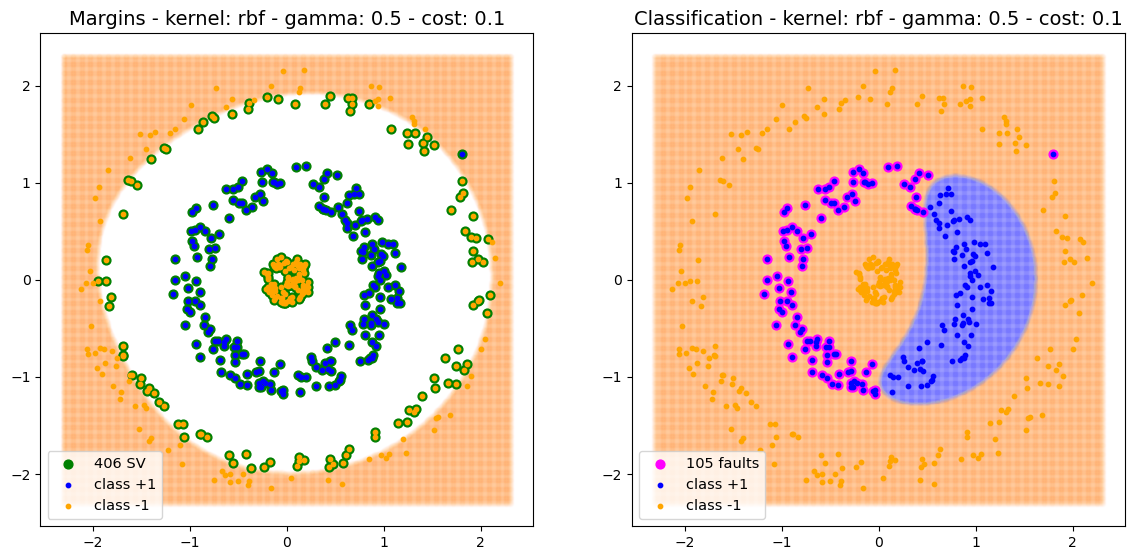

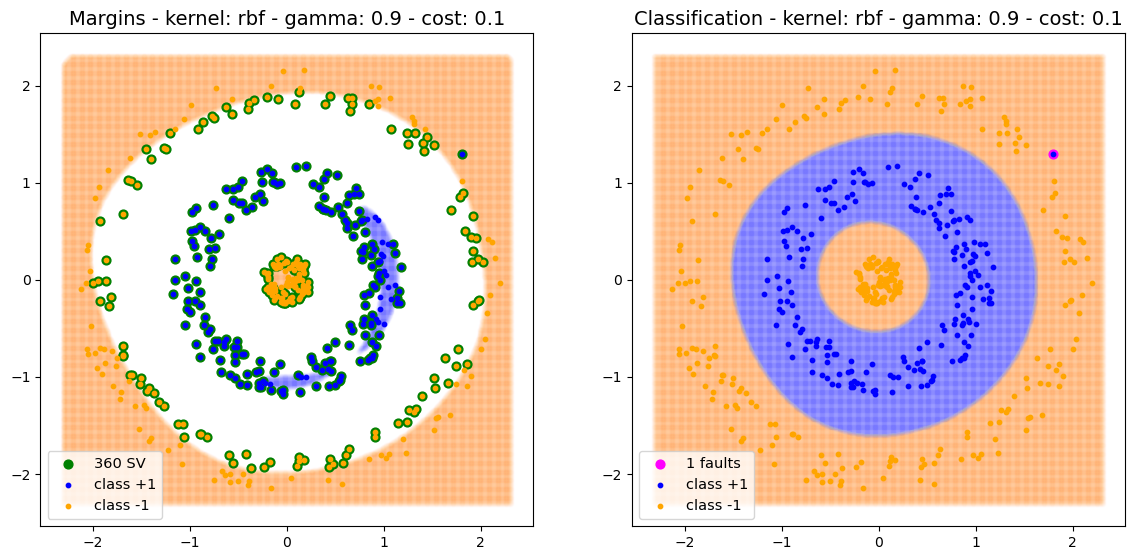

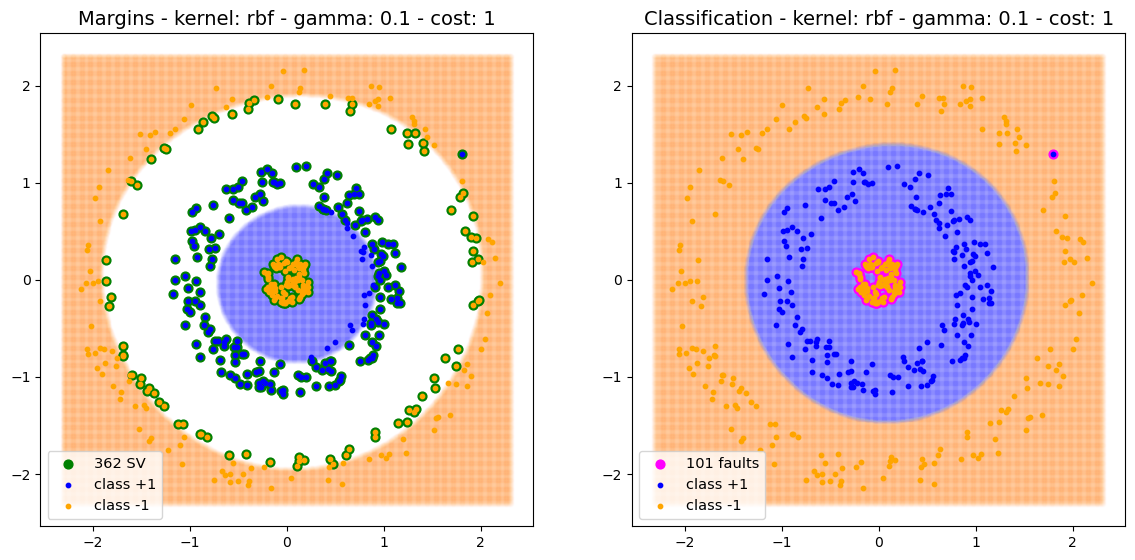

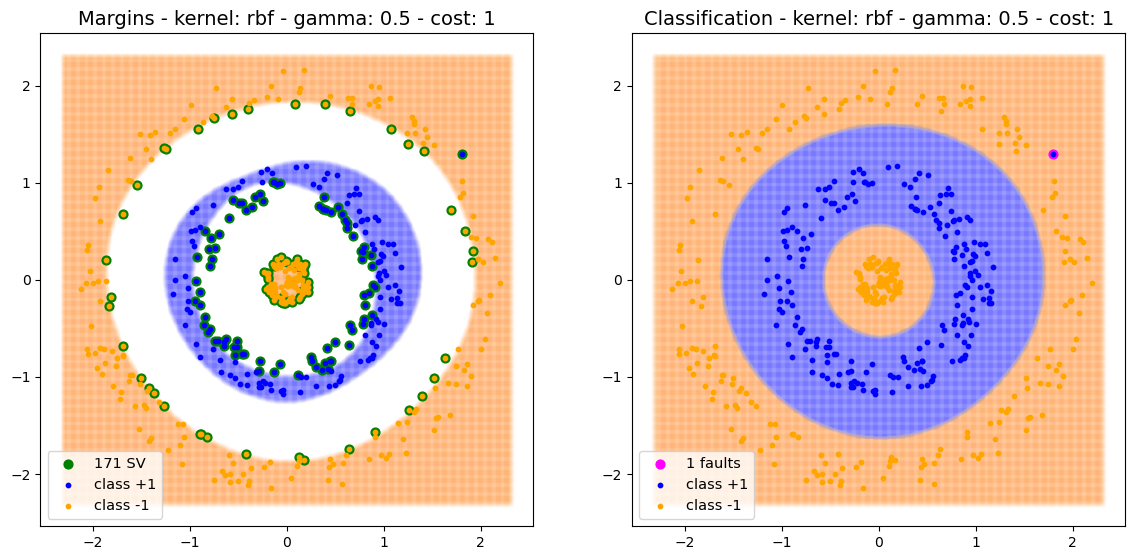

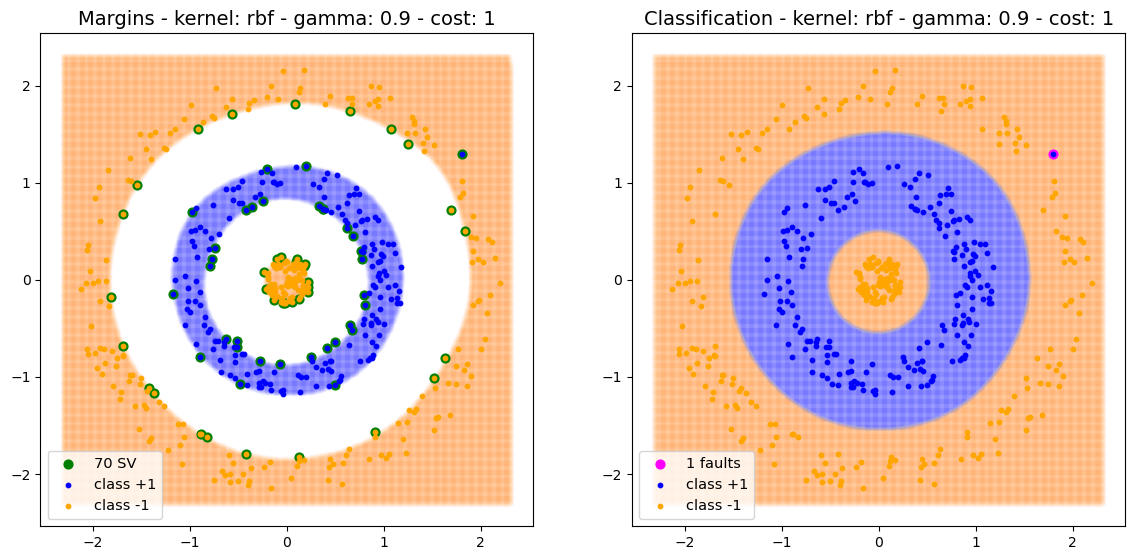

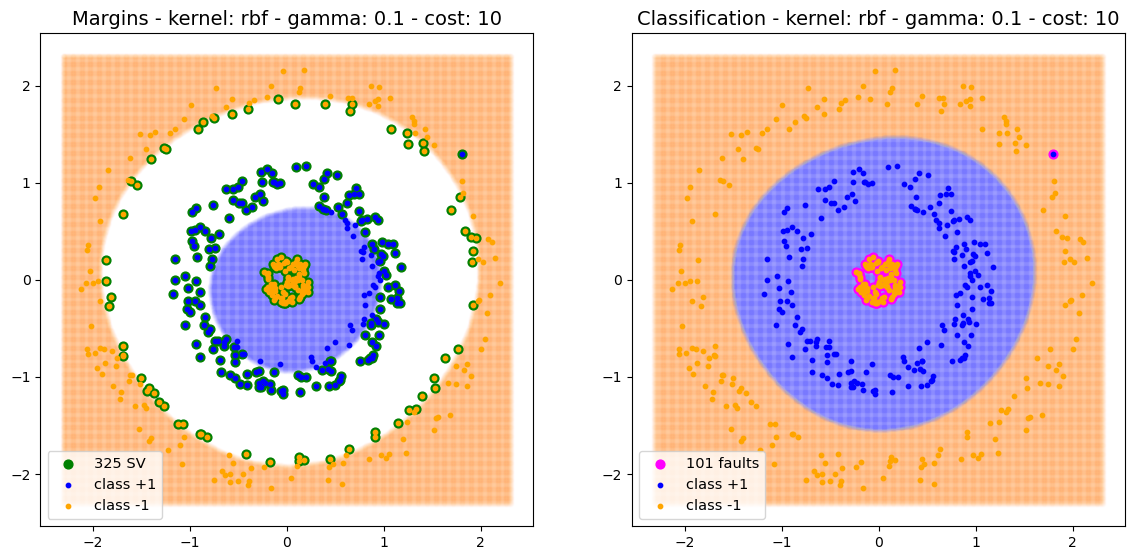

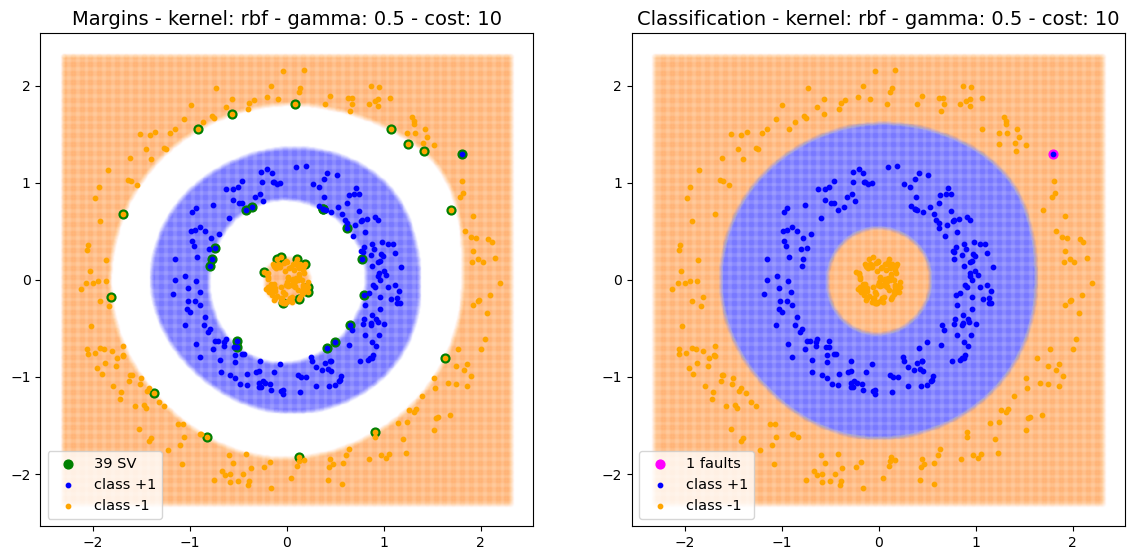

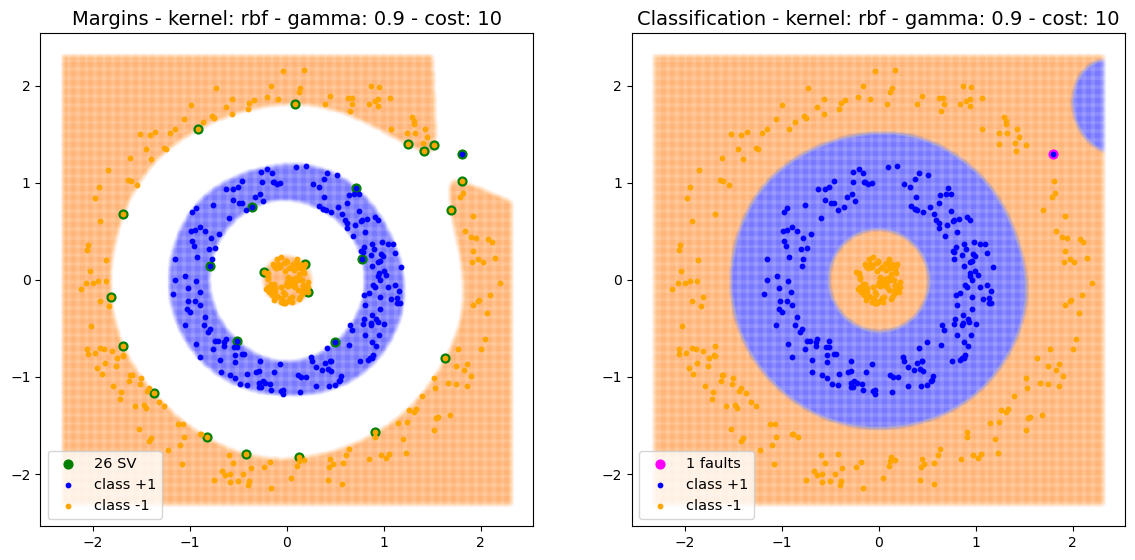

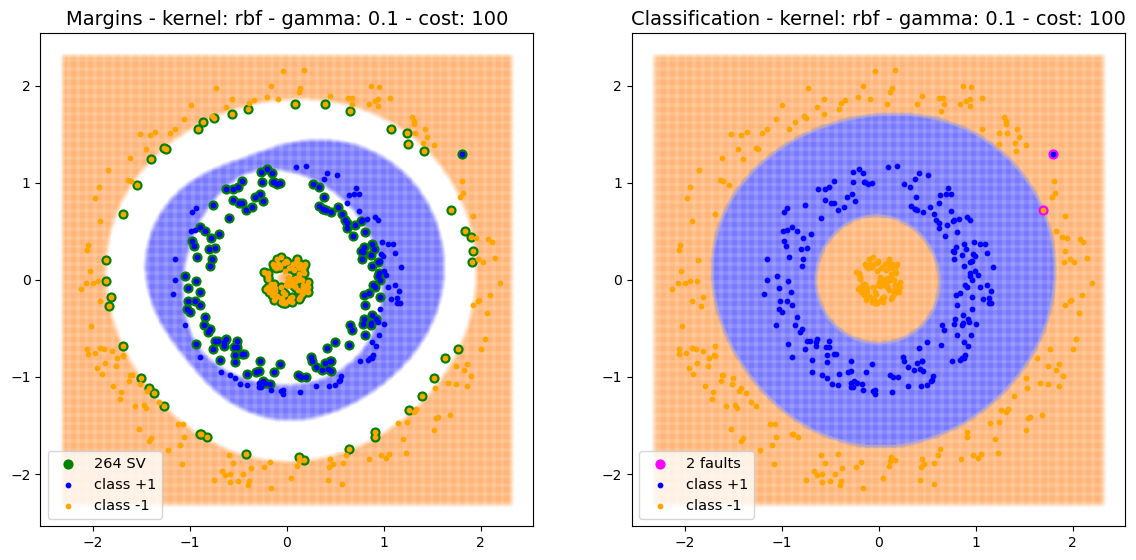

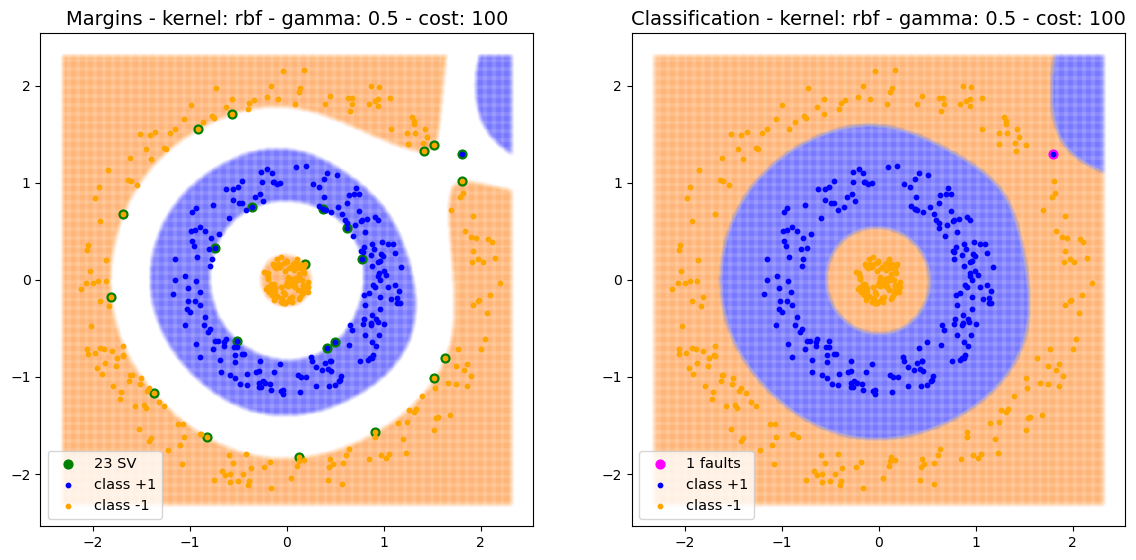

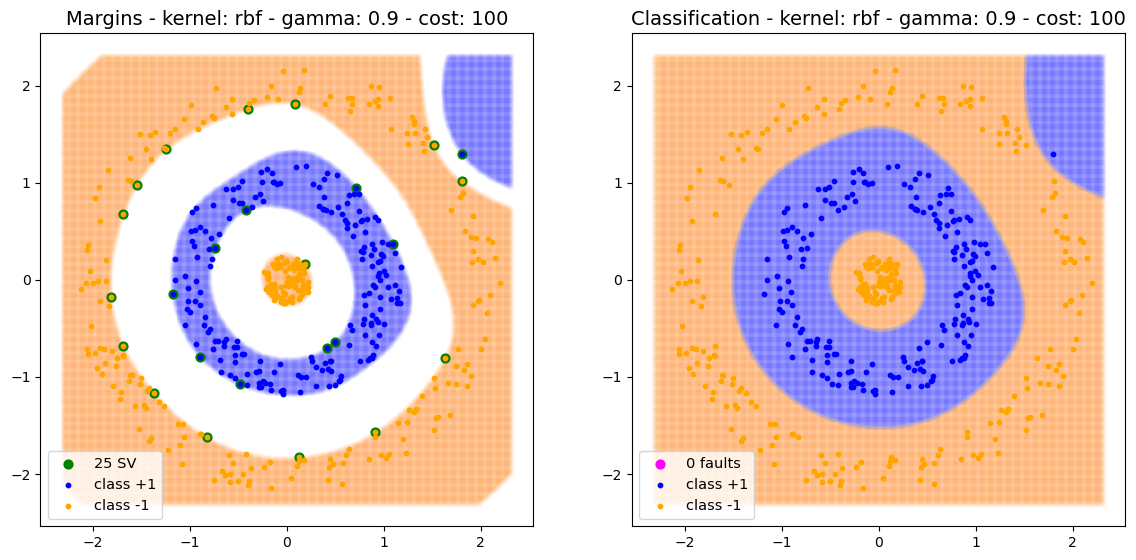

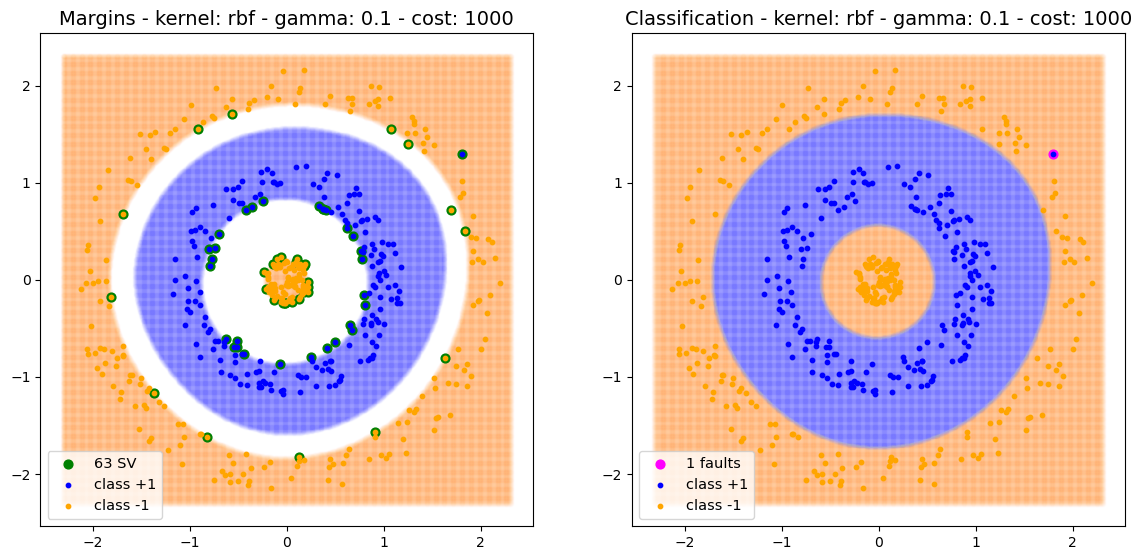

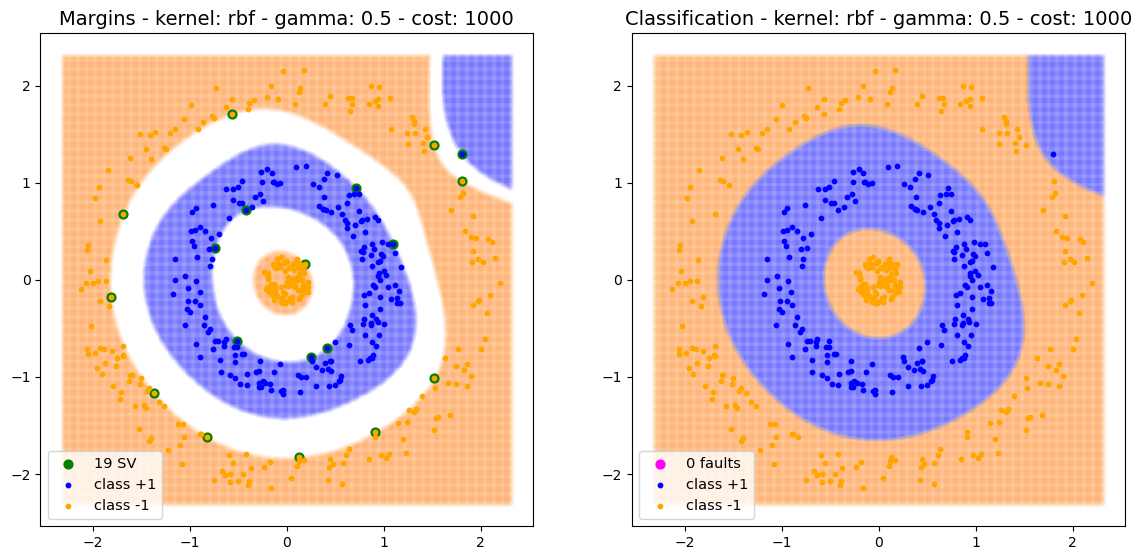

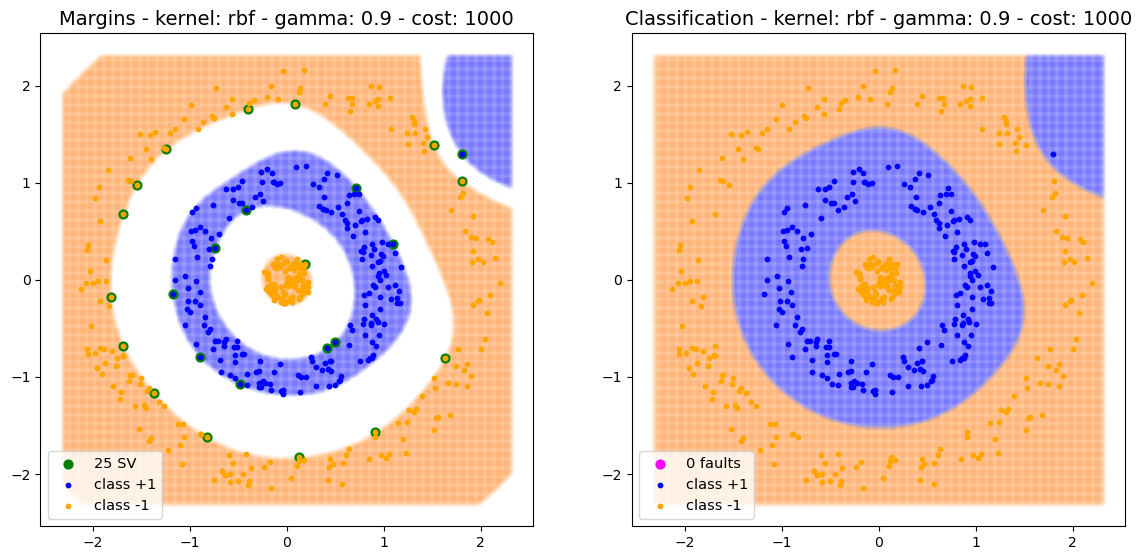

In [51]:
# This cell is just to discover the behaviour of SVM given the extra point, not graded.

cost_values = range(-1,4)
gamma_values = [0.1,0.5,0.9]

for cost in cost_values:
    iter_Gamma(gamma_values,10**cost,X_new_plus1,y_new_plus1)

<h3 style="color:rgb(210,90,80)">Question 4 (5 points):</h3>

What observations can you make from your plots? Tick the correct boxes:

a4_)  For relatively low costs (e.g. $C\le 1$) and an appropriately chosen $\gamma$ (e.g. $0.9$) the classifier correctly classifies all points except for the outlier. <br>
b4_)  For relatively high costs (e.g. $C\geq 100$) the classifier always, i.e. independent of $\gamma$, shows a region of the positive class near the outlier.<br>
c4_)  Classifiers with high costs ($C\geq 100$ say) and high $\gamma$ ($ \gamma \geq 0.5$) are susceptible to overfitting.<br>
d4_)  For relatively high costs ($C\geq 100$) and small $\gamma$ (0.1), the SVM correctly classifies except for the outlier.<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question. <br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

You are of course encouraged to further apply the given plot routine to further datasets and different hyperparameters to get further intuition!

In [52]:
example_true = True
example_False = False

a4_ = True
b4_ = True
c4_ = True
d4_ = False

In [53]:
#here you can experiment, cell is not graded

<h2 style=\color:rgb(0,120,170)\>Technical cells</h2>
    The cells below are needed for efficient unittesting.
    Do not delete or change in order to receive proper evaluation.<br>
    Executability check might help you with datatypes, but does not guarantee your answers are 100% correct

In [54]:
import matplotlib.figure
import matplotlib.collections
import matplotlib.axes
def X_y_tolist(X,y):
    return X.tolist(), y.tolist()

def testoptions(options):
    for elem in options:
        if elem!=True and elem!=False and elem!=None:
            raise ValueError(f"Check answers for questions again")
    print("Test questions answers are ok")

In [55]:
try:
    X_y_tolist(X,y)
except:
    raise ValueError("Check your X and y variables")
try:
    X_y_tolist(X_new,y_new)
except:
    raise ValueError("Check your X_new and y_new variables")
testoptions(np.array([a1_,b1_,c1_,d1_,e1_,f1_,a2_,b2_,c2_,a3_,b3_,c3_,d3_,a4_,b4_,c4_,d4_]))

Test questions answers are ok
